# What can we know about the heart attack?
# Jun Wei, Yunhao Yang, Xiaoyi Xu

## 1.Abstract
This project aims to find factors which would put significant effect on whether a patient is prone to heart attack and solve the problems such as what is the result of prediction based on the outputs we get. We use the data set about heart attack from Kaggle. We do statistic researches by Python including exploratory data analysis,fitting logistic regression model and classifying.

# 2.Introduction
## 2.1 Background
According to data from the World Health Organization, one of the leading causes of death in the world is heart disease. In 2019, nearly 9 million people died of heart disease globally, an increase of more than 2 million compared to 2000. 16% of all deaths worldwide were caused by heart disease. However, clinical care for heart disease is expensive and time-consuming. These direct costs transfer the scarce resources of the family and society to medical care. Heart disease affects individuals at the peak of middle age, thereby disrupting the future of the family on which they depend. At the same time, they lose precious human resources at the peak of their lives and damage the development of the country. Therefore, heart disease must be widely and profoundly understood.
## 2.2 Motivation
So what factors will ultimately affect the heart attack? How can we reasonably effectively prevent heart disease based on these factors? At the very least, distinguish people who are prone to heart disease for follow-up control.To help the public recognize the current situation of heart disease, we try to depict this disease through data and try to find some relationship between heart attack and several influential factors. We hope that our project can be the reference for the normal people to understand the disease more objectively and help the government and healthcare worker to face it easier.
## 2.3 Data description
In this project, the analysis uses data of the heart attack from [Kaggle](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).
The original data set contains 303 sets of observations and 14 different variables. Each observation represents various information of each patient. 
*  dependent variable
** output: Categorical variable used to indicate whether it is prone to heart attack (0 = less chance of heart attack, 1 = more chance of heart attack).
* categorical independent variables
** sex: Gender of the patient (0 = male, 1 = female).
** cp: Chest Pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
** fbs: Whether fasting blood sugar is greater than 120 mg/dl (0 = false, 1 = true).
** restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria).
** exng: Whether exercise induce angina (0 = no, 1 = yes).
** slp: Slope (0-2).
** caa: Number of major vessels (0-3).
** thall: Thalium Stress Test result (0-3).
* numerical independent variables
** age: Age of the patient.
** trtbps: Resting blood pressure (in mm Hg).
** chol: Cholestoral in mg/dl fetched via BMI sensor.
** thalachh: Maximum heart rate achieved.
** oldpeak: Previous peak.

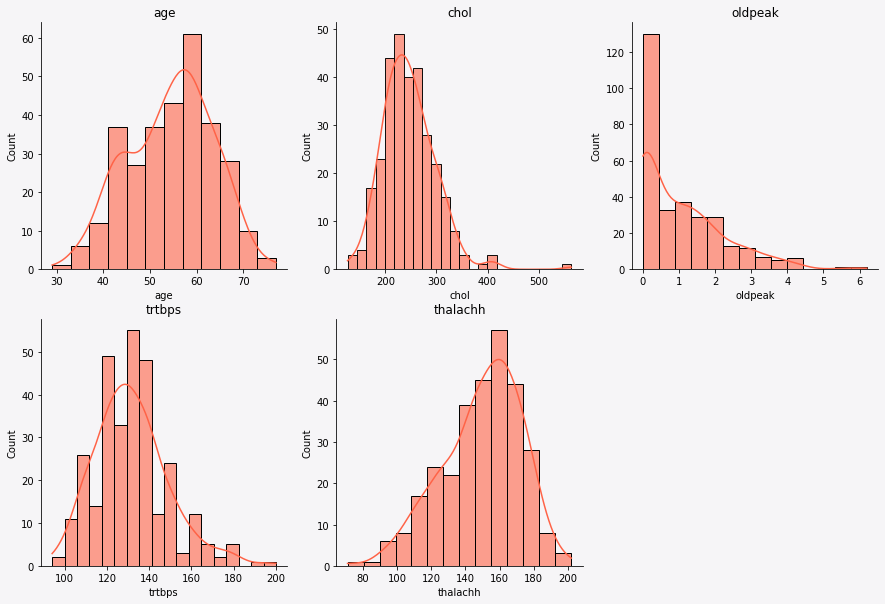

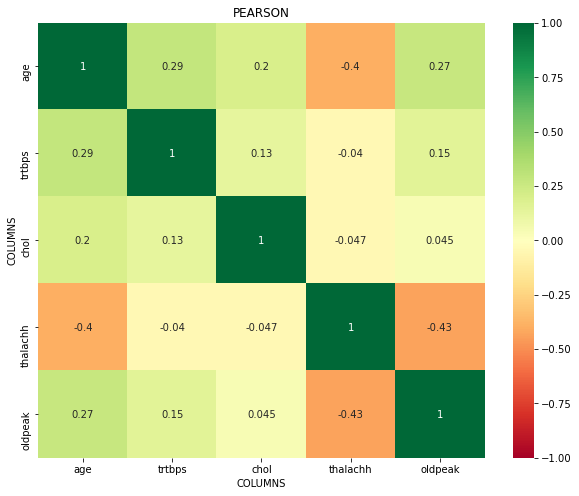

-0.09844660247479392
-0.06865301584014487
0.27935090656128836
-0.22543871587483733
-0.049352875346989344
-0.05676882396964334
-0.280936575501767
0.0476077606446485
0.43379826150689427
-0.14493112849775158


In [1]:
%run ../code/2.py

Here, we first conduct a preliminary analysis of five numerical variables. From their distribution diagrams, we can see that the distribution of these variables is different. The distribution of age is basically symmetrical, the distribution of chol and trtbps is right-biased, the distribution of tahlachh is left-biased, and the distribution of oldpeak is decreasing.

We also study the correlation between these five numerical variables. From the correlation graph, we can see that there is a correlation between certain variables, especially the correlation coefficients between thalachh-age pair and thalachh-oldpeak pair are certain significant, reaching 0.4.

We further use the data munging to design some algorithm to calculate the correlation coefficient between the various variables. The results obtained are basically consistent with those in the correlation graph.

## 2.4 Questions of interest
The first task of this project is to find factors that have a significant effect on the heart attack and study their effects. The second is to explore the accuracy of dividing quality. So we put forward corresponding questions based.
* For individuals with different outputs, what are the differences in various indicators?
* For individuals with different genders and exng, what are the differences in various indicators?
* What is the difference in the number and proportion of ‘patients’ in each age group?
* What is the result of classification using logistic regression?

## 2.5 Potential impact of result
We believe that the results of this project will have positive effects on all aspects of society, especially the healthcare workers and patients themselves. First of all, these results are the responses to current public healthy problem. They analyze the internal causes of problem, which will enable people to better understand the deep influential relationship. Then, these results will provide some advice and ideas for government and healthcare workers who need to update strategies to better govern medical system and better prevent the occurrence of heart disease, so that they can choose the most beneficial plan based on the results. In the subsequent adjustment and relevant changes can be made according to the results of this project to improve the situation of public health.



## 3. Solutions to question 1

In this question, we will concern the differences between different output. First, we can check the mean value of the numerical variables in different output.

In [2]:
%run ../code/3.1.py

    avg(age)  avg(trtbps)   avg(chol)  avg(thalachh)  avg(oldpeak)  output
0  56.601449   134.398551  251.086957     139.101449      1.585507       0
1  52.496970   129.303030  242.230303     158.466667      0.583030       1


In this table, we can see that for patients with different outputs, the mean value of the numerical variables are quite different, especially in chol, thalachh, and oldpeak. This may implied that we can use these variables to predict the outputs of the patients.

Now, let's check more details of these variables.

In [3]:
%run ../code/3.2.py

              age      trtbps        chol    thalachh     oldpeak  output
count  138.000000  138.000000  138.000000  138.000000  138.000000   138.0
mean    56.601449  134.398551  251.086957  139.101449    1.585507     0.0
std      7.962082   18.729944   49.454614   22.598782    1.300340     0.0
min     35.000000  100.000000  131.000000   71.000000    0.000000     0.0
25%     52.000000  120.000000  217.250000  125.000000    0.600000     0.0
50%     58.000000  130.000000  249.000000  142.000000    1.400000     0.0
75%     62.000000  144.750000  283.000000  156.000000    2.500000     0.0
max     77.000000  200.000000  409.000000  195.000000    6.200000     0.0
              age      trtbps        chol    thalachh     oldpeak  output
count  165.000000  165.000000  165.000000  165.000000  165.000000   165.0
mean    52.496970  129.303030  242.230303  158.466667    0.583030     1.0
std      9.550651   16.169613   53.552872   19.174276    0.780683     0.0
min     29.000000   94.000000  126.000

In these two tales, we can see more details about the differences of numerical variables for the patients with output = 0 and output =1.

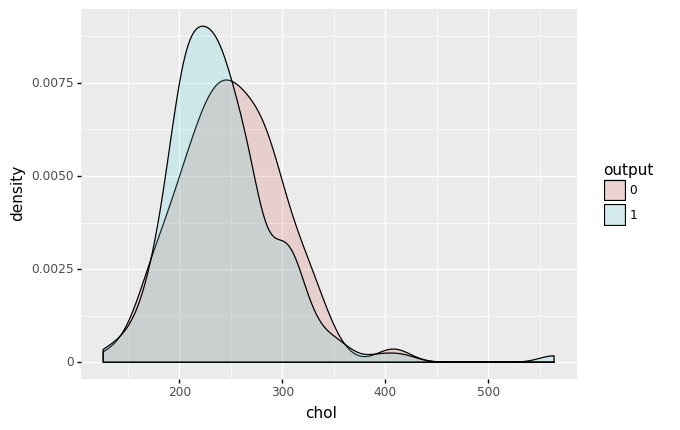

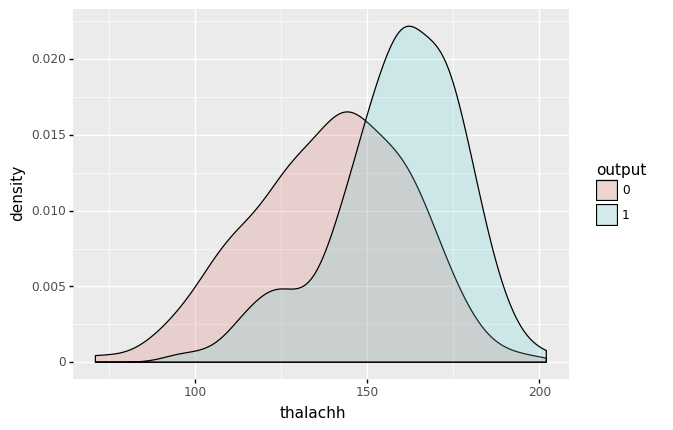

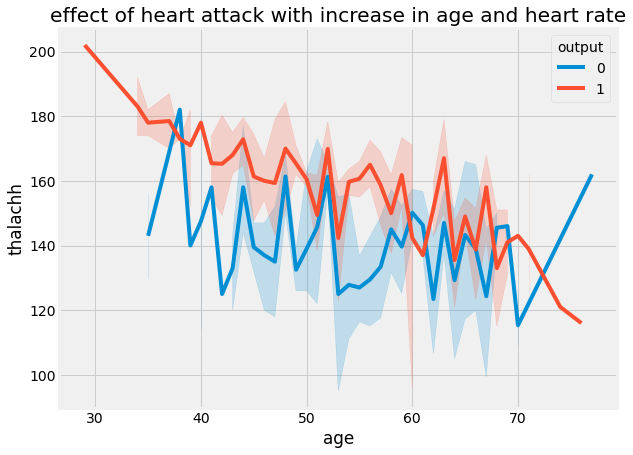

In [4]:
%run ../code/3.3.py

In the density plot of chol, we can see that the patients with chol lower than 250 have more chance to have heart attack. Similarly, in the density plot of thalach, we can see that the patients with maximum heart rate higher than 150 have more chance to have heart attack.

And in the line plot, we can see the relationship between maximum heart rate and the age in different outputs. Generally, the heart rate decrease with the increase of age. And for patitents have more chance to have heart attack, they tend to have higher heart attack.

Besieds these numerical variables, we also concern some categorical variables between different output.

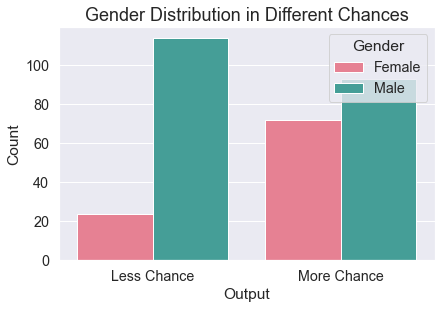

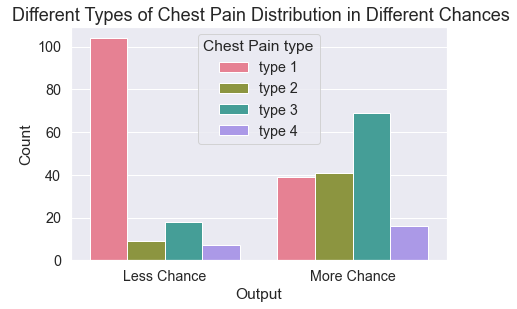

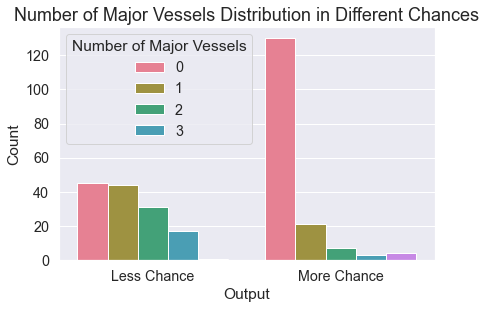

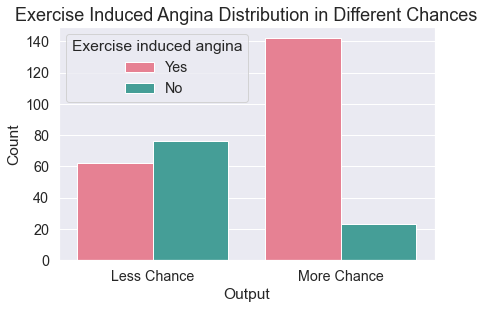

In [5]:
%run ../code/3.4.py


In the distribution of gender, we can see that female have the higher proportion to have heart attack than male.

And in the distribution of types of chest pain, we can see that type 1 has lower chance to have heart attack and type 3 have higher cahnce to have heart attack.

Concerning the number of major vessels, we can say that patients without major vessels have more chance to have heart attack.

And in the plot of distribution of exng, we can see that patients with exercised induced angina have more chance to have heart attack.

## 4. Solutions to question 2

In this part, we will concern for individuals with different genders and exng, what are the differences in various indicators? 

### 4.1 The distribution of each variable in different genders

    avg(age)  avg(trtbps)   avg(chol)  avg(thalachh)  avg(oldpeak)  sex
0  55.677083   133.083333  261.302083     151.125000      0.876042    0
1  53.758454   130.946860  239.289855     148.961353      1.115459    1


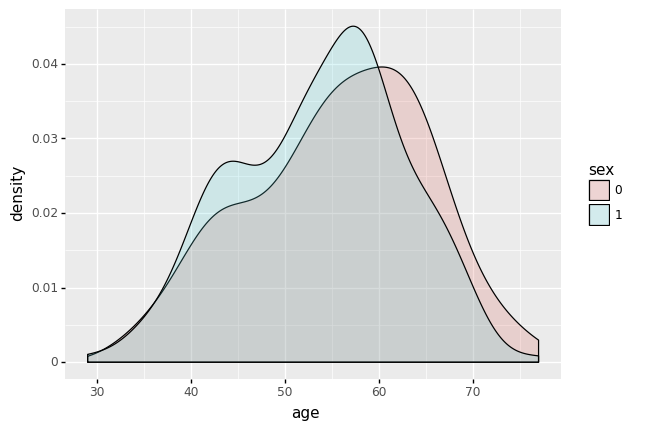

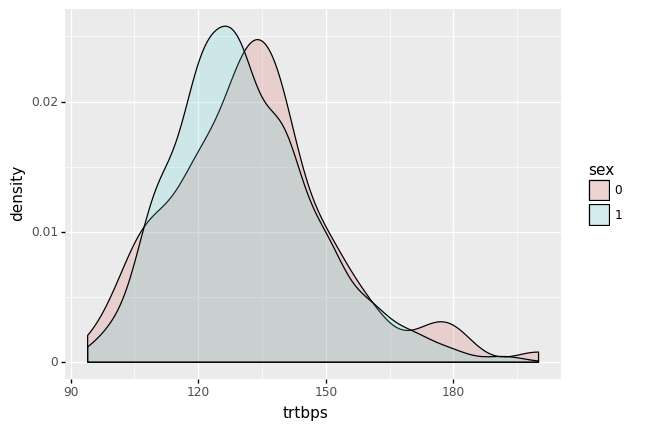

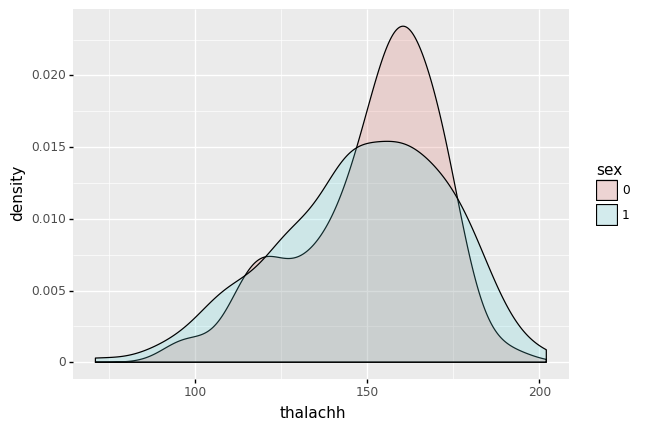

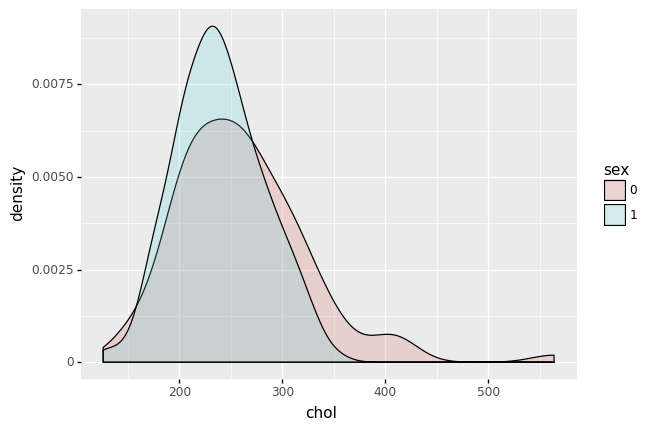

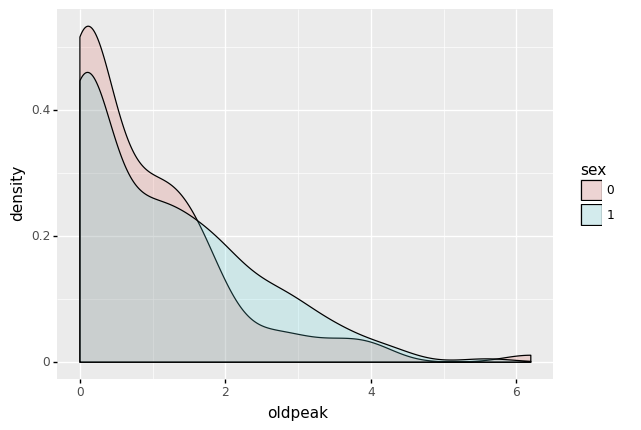

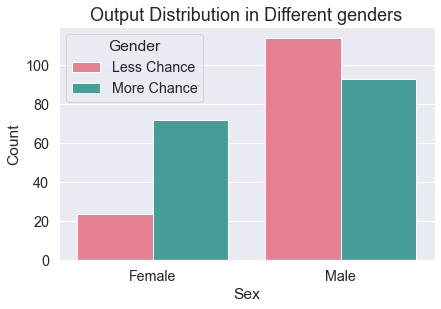

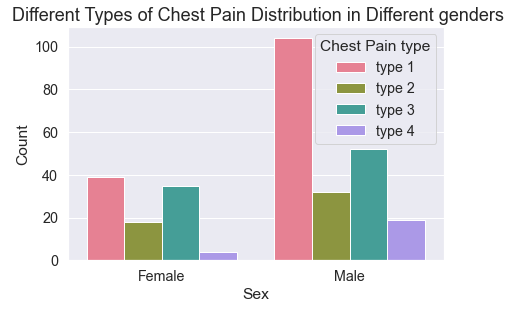

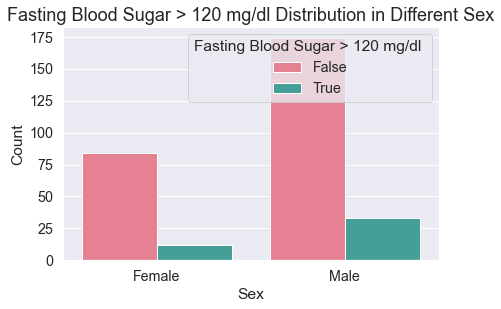

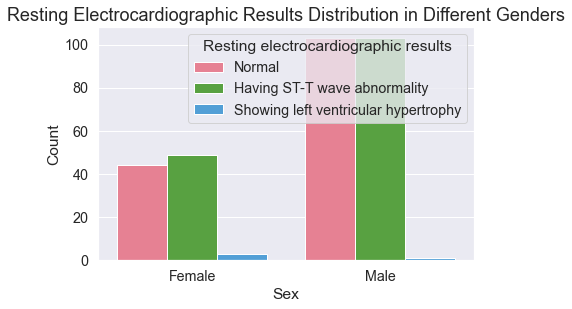

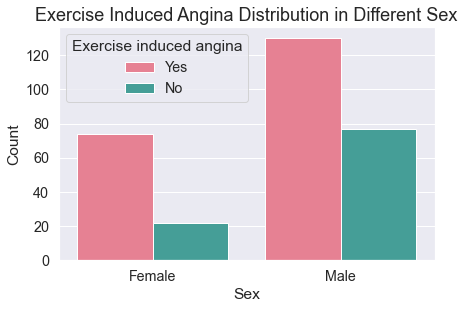

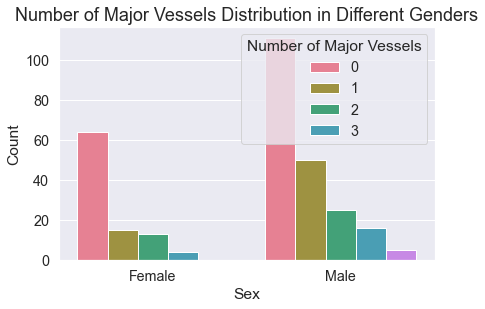

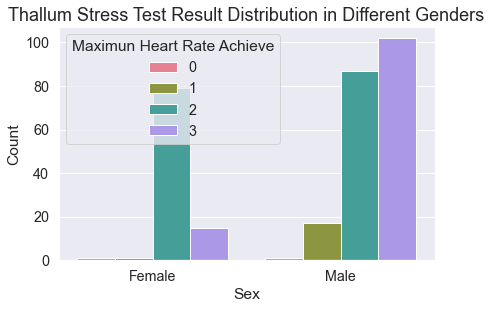

In [6]:
%run ../code/4.1.py

First, we can check the mean value of the numerical variables in different genders. 0 stands for the female and 1 stands for the male. In the table, the female have higher average value of age, trtbps, chol and thalachh. The male have higher average value of oldpeak. Then, we explore the distribution of each variable in different genders.

According to the density plot of the age in different genders, there are more males in the middle aged (40 to 60 years). In the density plot of trtbps in different genders, the distibutions in two cases have big overlap. Trtbps (Resting Blood Pressure) has weak or slightly negative relation with genders. According to the density plot of thalachh, there are more females with the value of thalach (Maximum Heart Rate Achieved) between 150 and 175. From the density plot of chol in different genders, we can find that the female tends to have higher Chol(cholestoral in mg/dl fetched via BMI sensor). According to the density plot of oldpeak in different genders, the male tends to have higher value of oldpeak. Then we explore the distribution of each categorical variable in different cases of the output.

According to the distribution plot of output in different genders, female are more likely to have heart problem than male (based on ratio). According to the distribution plot of cp in different genders, the male are more likely to have type 1 chest pain. According to the distribution plot of fbs in different genders, there is no obvious relation between fasting blood sugar and sex based on the ratio. According to the distribution plot of restecg in different genders, more males' resting electrocardiographic results are normal and having ST-T wave abnormality and more females' resting electrocardiographic results are showing left ventricular hypertrophy. According to the distribution plot of exng in different genders, more males' exercise does not induce angina. According to the distribution plot of caa in different genders, based on the ratio, people whose number of major vessels is 1 account for a larger proportion of males compared to the propotion of the females. According to the distribution plot of thall in different genders, males tend to have Thall == 3.

### 4.2 The distribution of each variable in different exng

    avg(age)  avg(trtbps)   avg(chol)  avg(thalachh)  avg(oldpeak)  exng
0  53.754902   130.799020  243.848039     155.681373      0.806863     0
1  55.626263   133.323232  251.242424     137.212121      1.519192     1


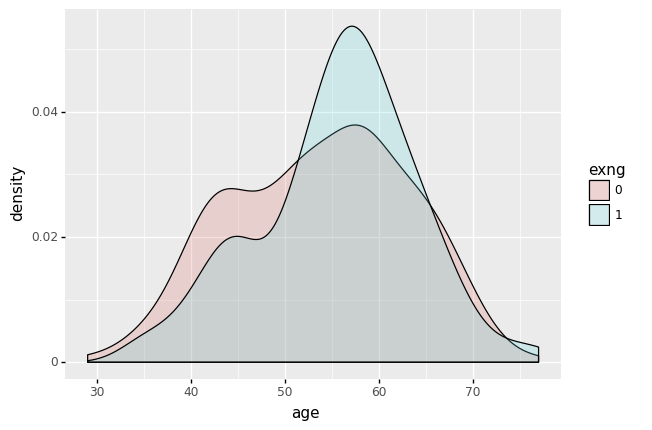

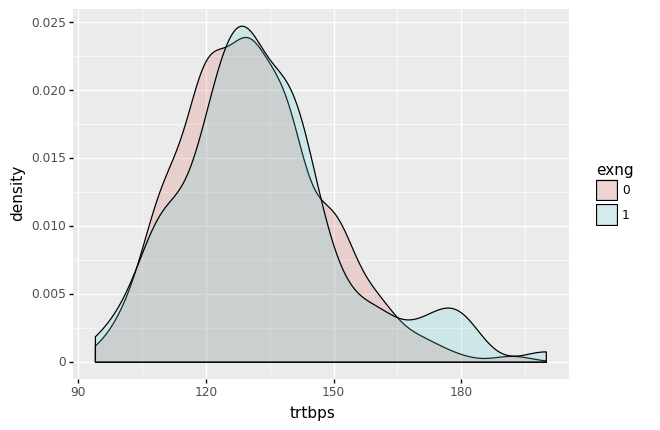

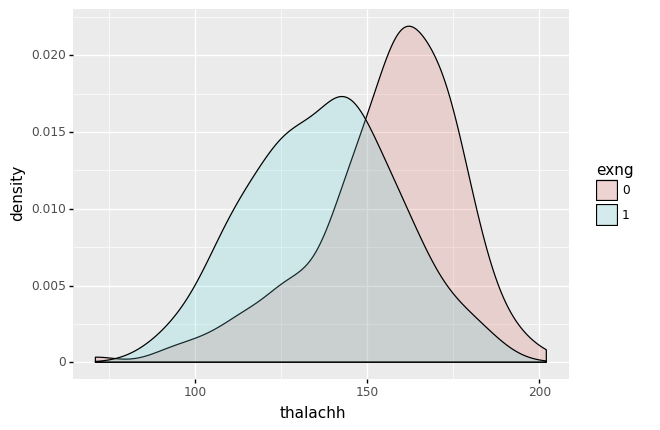

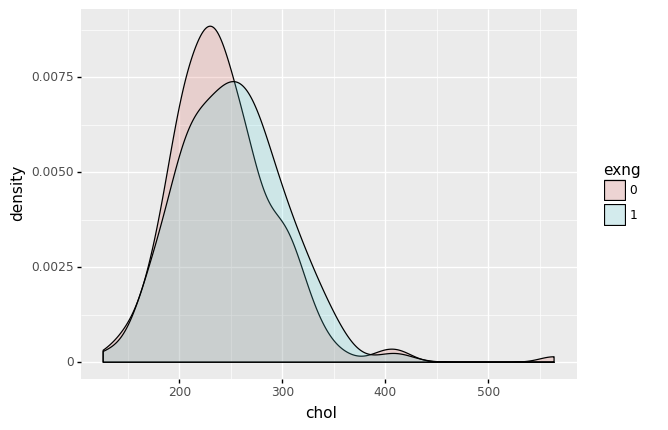

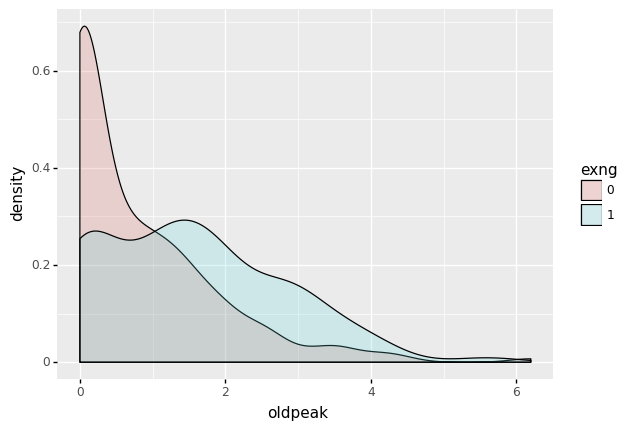

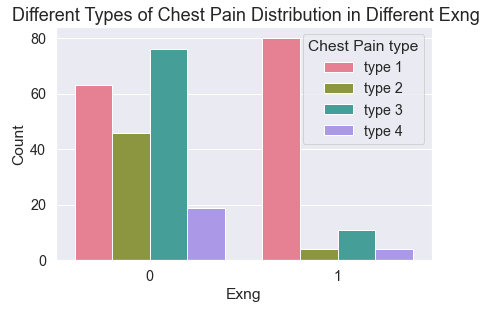

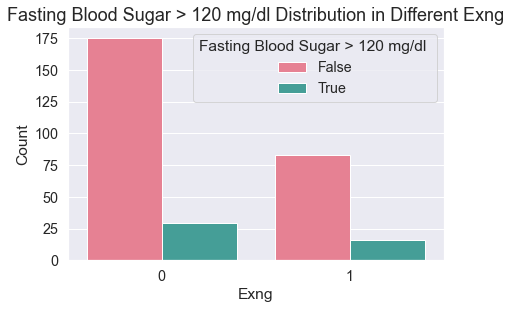

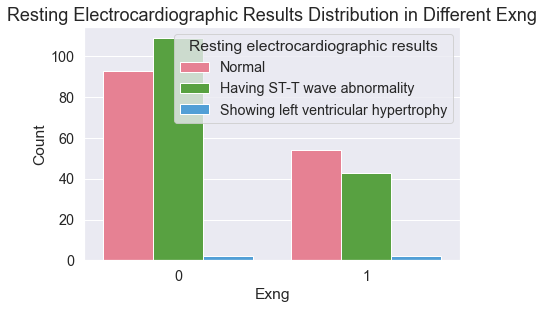

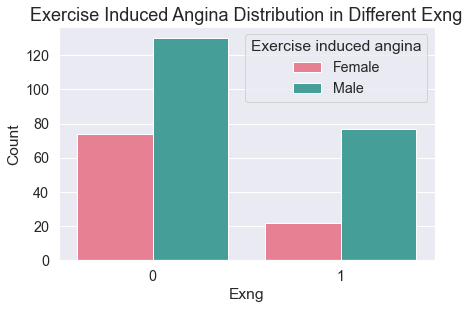

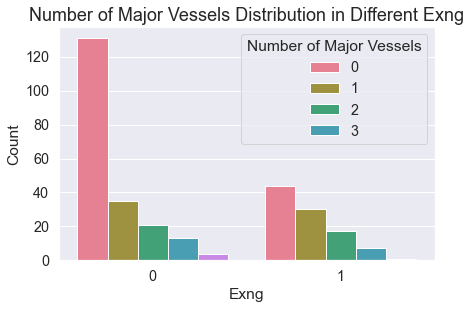

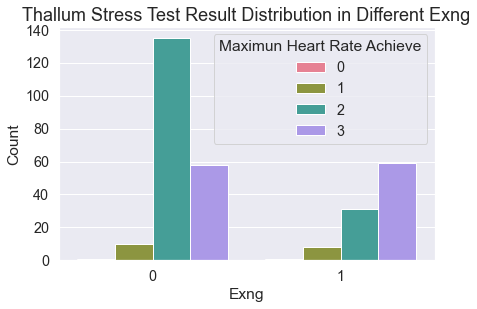

In [7]:
%run ../code/4.2.py

First, we can check the mean value of the numerical variables in different exng. 0 means that exercise does not induce angina and 1 means that exercise induce angina. In this table, we can see that for patients with different exng, the mean value of the numerical variables are quite different, especially thalachh. Then, let's check more details of these variables.

According to the density plot of age in different exng, more people with exng=1 are between 50 to 65 years old. According to the density plot of trtbps in different exng, there is obvious difference of trtbps between people with exng=0 and exng=1. According to the density plot of thalachh in different exng, people with exng=0 tend to have higher thalach. According to the density plot of chol in different exng, more people with exng=0 have chol value between 200 and 250. According to the density plot of oldpeak in different exng, people with exng=1 tend to have higher oldpeak. Then, let's check the distribution plot of categorical variables in different exng.

According to the distribution plot of cp in different exng, people with exng=0 are more likely to have type 3 chest pain. According to the distribution plot of fbs in different exng, there is no obvious relation between exng and fbs based on the ratio. According to the distribution plot of cp in different exng, people with exng=0 are more likely to have type 3 chest pain. According to the distribution plot of fbs in different exng, there is no obvious relation between exng and fbs based on the ratio. According to the distribution plot of sex in different exng, more males have exng=0 based on the ratio. According to the distribution plot of caa in different exng, people with exng=0 are more likely to have 0 number of major vessels. According to the distribution plot of thall in different exng, people with exng=0 are more likely to achieve 2 level maximum heart rate.

## 5. Solutions to question 3

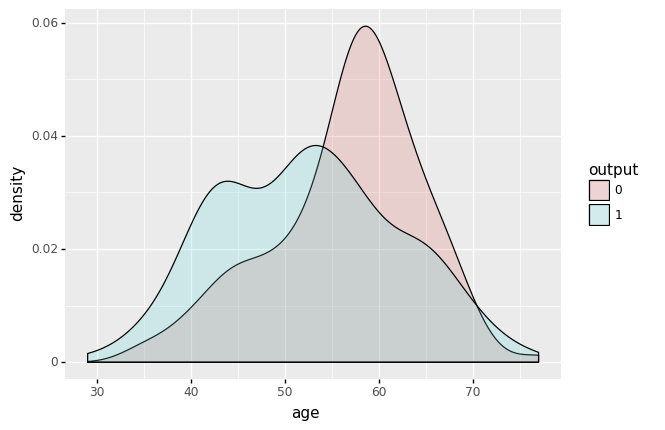

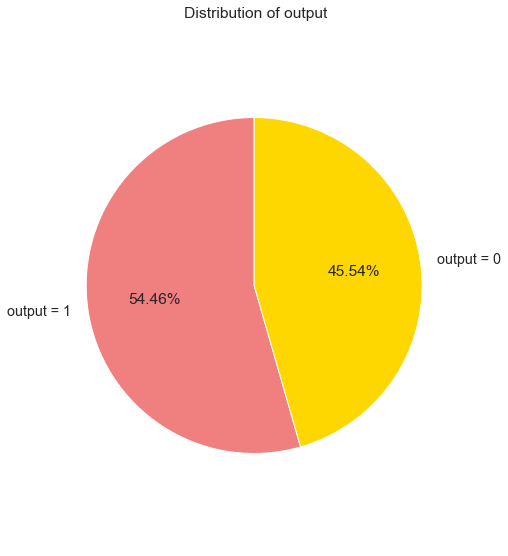

In [8]:
%run ../code/5.1.py

For this question about age and output, firstly I do the overall analysis. From the density plot we can see that output equals 1 and 0 has different distribuions including the peak values, the trend. And according to a simple calculation and a pie chart we know that in our data set, the proportion of two kinds of output is not even, the proportion of output equals 1 is lagrger than 54%.

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


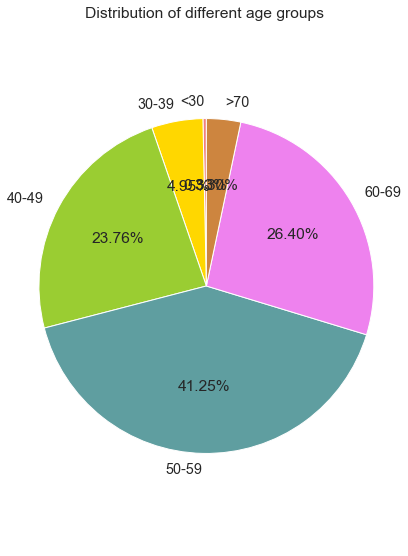

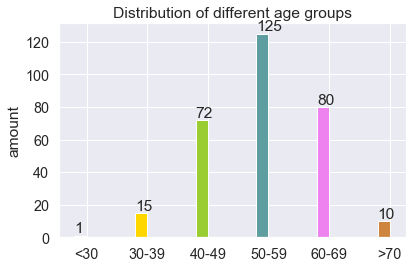

In [9]:
%run ../code/5.2.py

Then we do some further research. After seeing the describe table of age we know that we should do the data grouping for the following part. In this table we get the minimum of age is 29 in this project and the maximum is 77. So we divide the original data set into six groups and each group includes a ten-year period.

Both of the pie chart titled as 'Distribution of different age groups' and the bar chart titled as 'Distribution of different age groups' tell us that the distribution of this data set in terms of age is not so even in aspect of proportion and absolute value.



     age  output = 1  output = 0  total amount  proportion
0    <30           1           0             1    1.000000
1  30-39          11           4            15    0.733333
2  40-49          50          22            72    0.694444
3  50-59          65          60           125    0.520000
4  60-69          32          48            80    0.400000
5    >70           6           4            10    0.600000


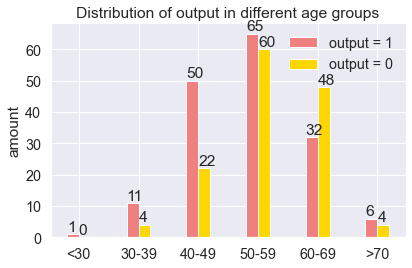

In [10]:
%run ../code/5.3.py

In the next step, we collect some important information into a table. The second column represents the amount of people who are prone to heart attack in each age group. The third column represents the amount of prople who are not prone to heart attack in each age group. The fourth column shows the total amount of sample in each age group and the last column shows the in-group proportion of output equals 1. According to the following bar chart titled as 'Distribution of output in different age groups' we can get the information more directly. The largest amount of sample with 1 output is in the 50-59 group and the second largest is in the 40-49group and the smallest amounts of sample with 0 output are in <30 group, 30-39 group and >70 group. 



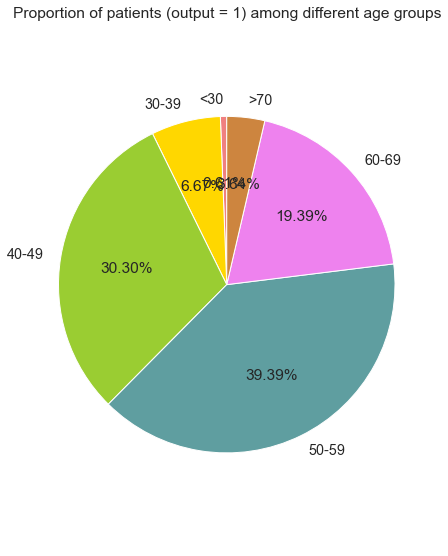

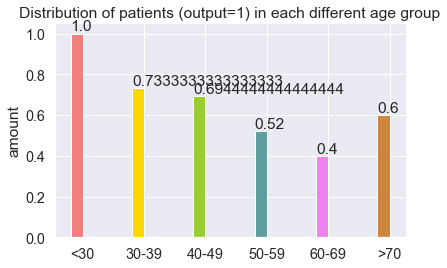

In [11]:
%run ../code/5.4.py

Finally, I analyzed the proportion of people who are susceptible to have heart disease from the vertical diretion (in the entire data set) and horizontal direction (in each age group). In the pie chart titled as 'Proportion of patients (output = 1) among different age groups' we can do the comparion with the previous pie chart titles as 'Distribution of different age groups' vertically. The proportion of 50-59 group on this chart is larger than that in the previous one. It means the amount of sample being prone to heart attack is larger than it should be under the normal proportions. Same condition also occurs in the 40-49 group. Horizontally, from the last bar chart in this part titled as 'Distribution of patients (output=1) in each different age group', we find that all the in-group level proportions are higher than 40%.

In conclusion, for this question, what surprises me and also be worth reminding the public is that we have always feel that the elderly are more susceptible to heart disease, so we take care of them well. But in fact middle-aged people are also susceptible to heart disease, so we need to pay more attention on their health condition.

## 6. Solutions to question 4

In order to better understand the data, we use logistic regression to explore which variables are significant for chance of heart attack. Then we introduce all the variables into the logistic regression model and we can get summary table of logistic regression as below.

Optimization terminated successfully.
         Current function value: 0.333189
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  212
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           12
Date:                Sun, 06 Jun 2021   Pseudo R-squ.:                  0.5148
Time:                        21:20:41   Log-Likelihood:                -70.636
converged:                       True   LL-Null:                       -145.59
Covariance Type:            nonrobust   LLR p-value:                 5.943e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0272      0.023      1.162      0.245      -0.019       0.073
sex           -1.9483      0.

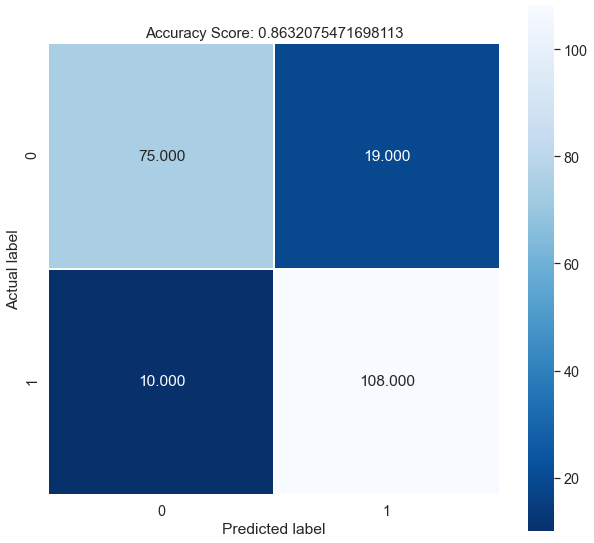

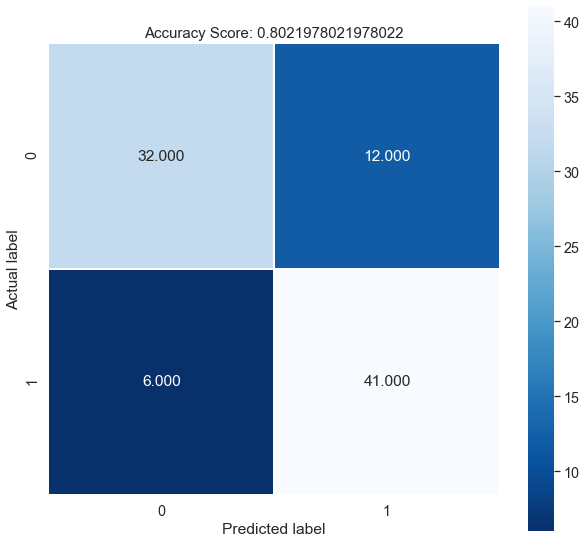

In [12]:
%run ../code/6.py

From the summary table, we can find that sex, cp thalachh, oldpeak, caa and thall are statistically significant at the significance level of 0.05. In order to learn more the detail of the classification, we plot the confusion matrix of train set and test set. The confusion matix of train set shows that 75 people with less chance of heart attack and 108 people with more chance of heart attack are classified correctly. 10 people with more chance of heart attack and 19 people with less chance of heart attack are misclassified. The accuracy is 0.863. The confusion matix of test set shows that 32 people with less chance of heart attack and 41 people with more chance of heart attack are classified correctly. 6 people with more chance of heart attack and 12 people with less chance of heart attack are misclassified. The accuracy is 0.802, which means the explanatory ability of this model is good.

## 7.Conclusion

We plan to conclude the results for the questions of interest in this part.

Not only the elderly are prone to heart disease, but middle-aged people and even young people are likely to get heart disease. This is very worthy of social consideration. Based on this conclusion, we can appropriately put forward some suggestions to the government and relevant medical workers. For example, in the process of research and treatment of heart disease, the age of the target subject should be lowered, and heart disease should be paid attention to in the whole society.

For different output groups, there are significant differences in almost all variables. For different gender groups, variables such as trtbps and chol have quite different distributions. For different exng groups, variables such as thalachh and oldpeak are quite different accordingly. These differences could help us build a logistic regression model to predict output and get a good prediction result.

## 8.Discussion

In this project, we conduct the visualization and other descrpitive analysis to our data set and we also try to construct a classification model to predict the outputs of the patients. We hope that our project can help the public to know more about heart attack and also help the medical worker judge the risk of heart attack clinically.

But there are still some spaces to improve in our project. We may can try more other types of the classification model and compare with the effect of them so we can find a related good model in predicting.Moreover, although the variables in the dataset are independent, we still should concern if there exist some potential relationships and we may can try to find some evidence to explain our conclusion, like why different gender shows different distributions of the variables and why the middle age patients have more chance to suffer from heart attack. These might need us to glean information from extende data and we also need to get more background knowledge of heart attack.  

Finally, we hope our project can be improved in the furture through more advanced methods.